# A/B Testing a Product Recommendation Section

## Experiment Design

**Problem Description 1**

- An eletronic shop, fictitiously named Eletronic House, sell products like TVs, cameras, laptops, headphones, HDMI and USB cables and much more. 
- The company has customers all over the world.
- Currently for a customer to end a transaction either on site or App, there is a manual form to fill during a credit card transaction.
- The Product Manager from the company requested a new automatic form filling process when purchasing with credit card, which was developed to fill at least 90% of the information.
- To then reach a conclusion of which credit card payment form was better in terms of effectiveness, an A/B Test should be applied, where A would be the group of clients that would
    continue to visualize the old payment process, and group B would be the clients that would be subject to the new payment process.
(Knowing the metric collected, number of purchases and amount spent, it doesn't makes sense to evaluate the efectiveness of a credit card payment form, I think.)
    
**Problem Description 2**

- An eletronic shop, fictitiously named Eletronic House, sell products like TVs, cameras, laptops, headphones, HDMI and USB cables and much more. 

- The company has customers all over the world.

- Currently there is a recommendation system to show related products to the ones already on the shop cart, and on the page there is a section where they are displayed in a way that would be intuitive for the client to associate and get the desire to purchase more products.

- The Product Manager from the company requested a new recommendation section design, which was developed to become even more intuitive.

- To then reach a conclusion of which recommendation system section design is better, the business metric set by the PM that he considers sufficient to choose the new section design is to sell at least 100% more products, i.e. the double the purchases per client. Or an increase on the amont spent per client of around 50%.

- Since there is a differrent design for the site and the App, two A/B Tests should be conducted, where A would be the group of clients that would continue to visualize the old section design, and group B would be the clients that would be subject to the new section design.

- The A/B test comes as a guarantee that both pages sections are at the same time or season and within the same current market and economic conditions.
    
**Business Metrics**

To evaluate and compare the recommendation section design it's possible to create two null hypothesis that is the number of purchases isn't different or the amount spent it's also not different between the two section designs.

**Experiment Design**

- Usually when making an experiment on a website, the two groups are segmented by randomly showing the different pages to visitors, and the main idea is to make the test blind to every subject, and balanced in terms of gender, localization and other clients aspects which is assured by attempting to give more information to this random segmentation process. 

- For the blindness normally its harder, since the user can start a process on a device and end on another one, where the landing page was already changed, but maybe if the IP address is the same, and the first public IP address is saved as of belonging to the respective user id. The latter option was a solution for clients that starts the purchase process but are not registered yet. If the client is already registered the displayed page should always be the same to a specific user id. 

- Regarding the balanced distribution of clients of different genders and locations, a verification should be made, since ideally it should exist the same number of men and women, and clients from every loaction, to have a unbiased metric collection in terms of getting clients within different conditions.

- Ideally the number of samples would be the same for each group, but it is not mandatory. 

- Since it was already collected a total of 22091 records for the site A/B test and a total of 22982 for the App A/B test, a statistical test can be used to calculate the difference between purchases per client, i.e. the difference between average purchases or variance, which demands a test that deals with quantitative data. The test chosen depends on the distribution the response variable has or the sample size. I think it can be a ANOVA test or F-Test if the outcome variable is the amount spent, since it is a continuous variable, but for the number of purchases can be other since it is a discrete variable.

- Hypothesis

- Assume if the test is feasible to collect the minimum amount of samples, knowing the effect size needed to be considered a success, the number of visitors per day, and the cost each test day has, which is related also with the business metric goal.

## Workspace Setup

***

### Library Imports

In [26]:
from IPython.display import display, HTML, Image
from matplotlib import pyplot as plt

import pandas as pd

### Settings

In [3]:
def jupyter_settings():
    
    display(HTML('<style>.container {width:100% !important;}</style>'))

In [4]:
jupyter_settings()

### Auxiliar Functions

## 0. Data Import and Setup

### Import Data

In [5]:
ab_form_df = pd.read_csv('../data/ab_testing.csv') 

### General Info

In [19]:
ab_form_df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,B,I
1,11122053,USA,M,498,2,2017-07-14,B,I
2,11128688,USA,F,2394,6,2017-09-17,A,I
3,11130578,USA,F,1197,3,2017-11-30,A,I
4,11130759,ESP,M,1297,3,2018-01-10,B,A


In [20]:
ab_form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45883 entries, 0 to 45882
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uid        45883 non-null  int64 
 1   country    45883 non-null  object
 2   gender     45883 non-null  object
 3   spent      45883 non-null  int64 
 4   purchases  45883 non-null  int64 
 5   date       45883 non-null  object
 6   group      45883 non-null  object
 7   device     45883 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [22]:
ab_form_df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,45883.0,5.544232e+07,2.558679e+07,11115722.0,33395751.5,55312026.0,77535569.0,99999383.0
spent,45883.0,1.883453e+03,1.363922e+03,99.0,897.0,1596.0,2593.0,12170.0
purchases,45883.0,4.544385e+00,3.102454e+00,1.0,2.0,4.0,6.0,30.0


## 1. Exploratory Data Analysis

In [10]:
ab_form_df = ab_form_df.replace(['GRP A','GRP B'],['A','B'])

In [12]:
ab_form_df.head()

,uid,country,gender,spent,purchases,date,group,device
0,11115722,MEX,F,1595,5,2016-03-08,B,I
1,11122053,USA,M,498,2,2017-07-14,B,I
2,11128688,USA,F,2394,6,2017-09-17,A,I
3,11130578,USA,F,1197,3,2017-11-30,A,I
4,11130759,ESP,M,1297,3,2018-01-10,B,A


In [11]:
ab_form_site_df = ab_form_df[ab_form_df['device'] == 'I']

ab_form_app_df = ab_form_df[ab_form_df['device'] == 'A']

In [8]:
ab_form_site_df.shape

(22901, 8)

In [9]:
ab_form_app_df.shape

(22982, 8)

In [13]:
ab_site_control_df = ab_form_site_df[ab_form_site_df['group'] == 'A']

ab_site_test_df = ab_form_site_df[ab_form_site_df['group'] == 'B']

In [14]:
ab_site_control_df.shape

(11522, 8)

In [15]:
ab_site_test_df.shape

(11379, 8)

In [16]:
ab_app_control_df = ab_form_app_df[ab_form_app_df['group'] == 'A']

ab_app_test_df = ab_form_app_df[ab_form_app_df['group'] == 'B']

In [17]:
ab_app_control_df.shape

(11487, 8)

In [18]:
ab_app_test_df.shape

(11495, 8)

<AxesSubplot:>

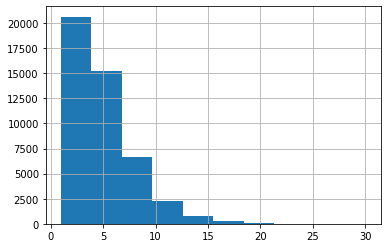

In [27]:
ab_form_df.purchases.hist()

<AxesSubplot:title={'center':'purchases'}, xlabel='group'>

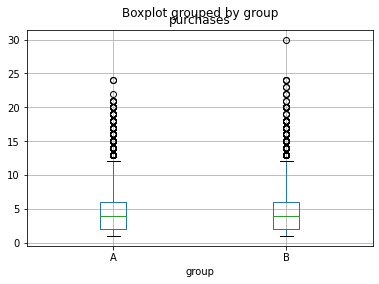

In [28]:
ab_form_site_df.boxplot(column='purchases', by='group')

<AxesSubplot:title={'center':'purchases'}, xlabel='group'>

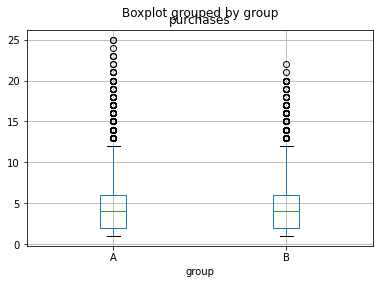

In [29]:
ab_form_app_df.boxplot(column='purchases', by='group')

<AxesSubplot:title={'center':'spent'}, xlabel='group'>

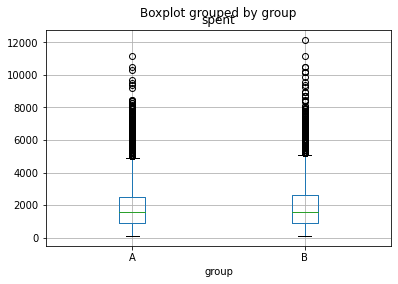

In [32]:
ab_form_site_df.boxplot(column='spent', by='group')

<AxesSubplot:title={'center':'spent'}, xlabel='group'>

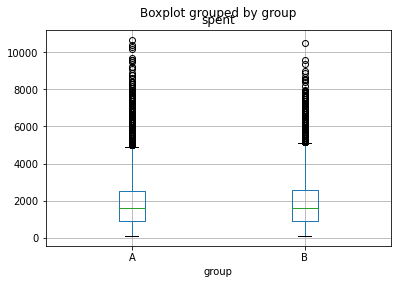

In [31]:
ab_form_app_df.boxplot(column='spent', by='group')